In [17]:
import pandas as pd
import pickle


df = pd.read_csv('Groceries_dataset.csv')

In [18]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [19]:
# convert ke tabular
from mlxtend.preprocessing import TransactionEncoder

transaction_list = transactions['itemDescription'].tolist()

te = TransactionEncoder()
te_array = te.fit(transaction_list).transform(transaction_list)

transaction_df = pd.DataFrame(te_array, columns=te.columns_)
transaction_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(transaction_df, min_support=0.005, use_colnames=True)
num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric='lift', min_threshold=1)

print(rules)

          antecedents         consequents  antecedent support  \
0  (other vegetables)       (frankfurter)            0.122101   
1       (frankfurter)  (other vegetables)            0.037760   
2           (sausage)              (soda)            0.060349   
3              (soda)           (sausage)            0.097106   
4           (sausage)            (yogurt)            0.060349   
5            (yogurt)           (sausage)            0.085879   

   consequent support   support  confidence      lift  representativity  \
0            0.037760  0.005146    0.042146  1.116150               1.0   
1            0.122101  0.005146    0.136283  1.116150               1.0   
2            0.097106  0.005948    0.098560  1.014975               1.0   
3            0.060349  0.005948    0.061253  1.014975               1.0   
4            0.085879  0.005748    0.095238  1.108986               1.0   
5            0.060349  0.005748    0.066926  1.108986               1.0   

   leverage  convi

In [23]:
with open('apriori_model.pkl', 'wb') as f:
    pickle.dump(rules, f)

print("Model berhasil disimpan menggunakan pickle.")


with open('apriori_model.pkl', 'rb') as f:
    loaded_rules = pickle.load(f)

print("Model berhasil dimuat!")
print(loaded_rules.head())  

Model berhasil disimpan menggunakan pickle.
Model berhasil dimuat!
          antecedents         consequents  antecedent support  \
0  (other vegetables)       (frankfurter)            0.122101   
1       (frankfurter)  (other vegetables)            0.037760   
2           (sausage)              (soda)            0.060349   
3              (soda)           (sausage)            0.097106   
4           (sausage)            (yogurt)            0.060349   

   consequent support   support  confidence      lift  representativity  \
0            0.037760  0.005146    0.042146  1.116150               1.0   
1            0.122101  0.005146    0.136283  1.116150               1.0   
2            0.097106  0.005948    0.098560  1.014975               1.0   
3            0.060349  0.005948    0.061253  1.014975               1.0   
4            0.085879  0.005748    0.095238  1.108986               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.000536    1.

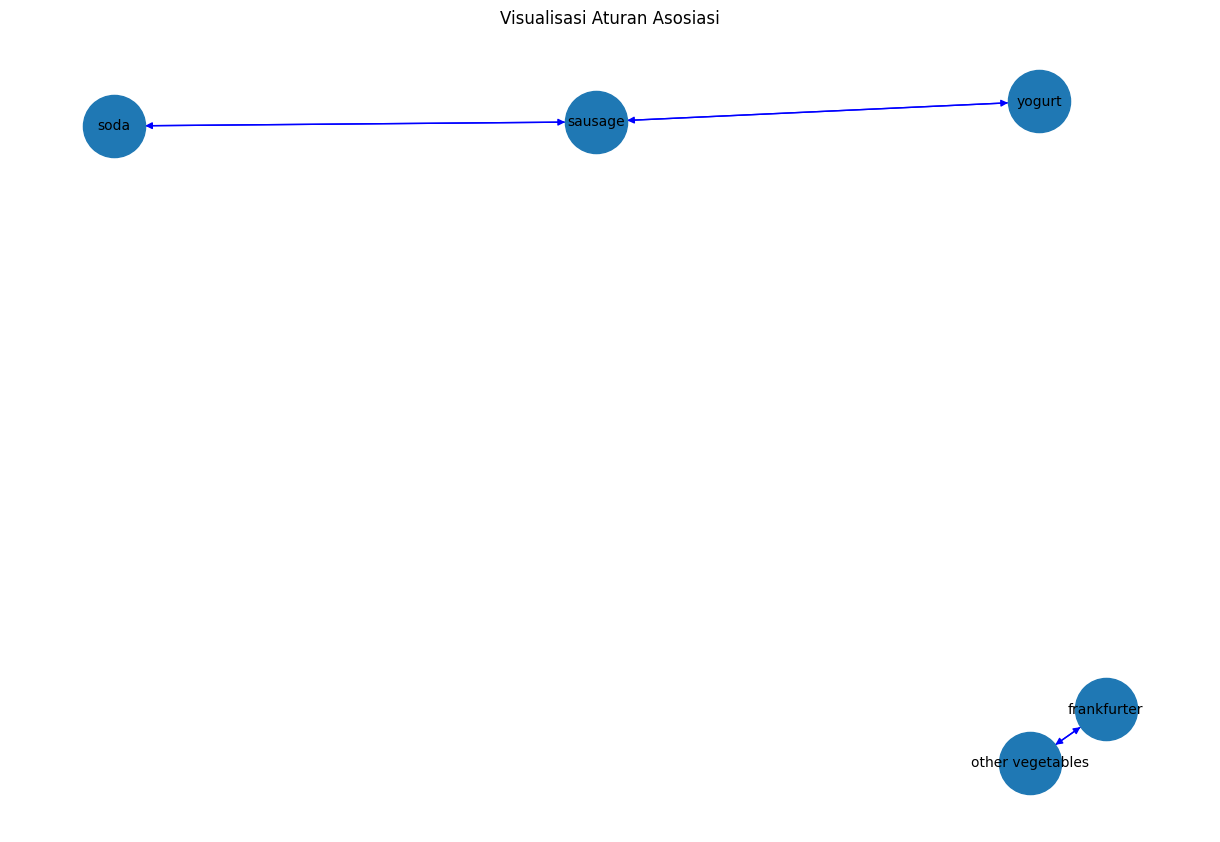

In [22]:
filtered_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.2)]

import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(", ".join(row['antecedents']), ", ".join(row['consequents']), weight=row['lift'])

pos = nx.spring_layout(G, k=0.3)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, edge_color="blue")
plt.title("Visualisasi Aturan Asosiasi")
plt.show()
